# Laboratory 3: ML Preliminaries

by: Kristoffer Dave A. Tabong  
Submitted by: Atlhea Concha, George Cruz

In [11]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1:

Create `mean_squared_error` which returns the MSE value.

In [12]:
def mean_squared_error(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")

    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mse = sum(squared_errors) / len(squared_errors)
    return mse

y_true = [1, 2, 3, 4]
y_pred = [1.1, 1.9, 3.2, 3.8]
print("Mean Squared Error:", mean_squared_error(y_true, y_pred))


Mean Squared Error: 0.025000000000000043


### Question 2:

Create `mean_abslute_error` which returns the MAE value.

In [13]:
def mean_absolute_error(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")
    
    absolute_errors = [abs(true - pred) for true, pred in zip(y_true, y_pred)]
    mae = sum(absolute_errors) / len(absolute_errors)
    return mae

y_true = [1, 2, 3, 4]
y_pred = [1.1, 1.9, 3.2, 3.8]
print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))


Mean Absolute Error: 0.15000000000000013


### Question 3:

Create `r2_score` which returns the coefficient of determination value, R2.

In [14]:
def r2_score(y_true, y_pred):
    # Check if the lengths of y_true and y_pred match
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")
    
    # Calculate the mean of y_true
    y_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
    total_sum_of_squares = sum((true - y_mean) ** 2 for true in y_true)
    
    # Calculate the residual sum of squares (RSS)
    residual_sum_of_squares = sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred))
    
    # Compute the R-squared score
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares) if total_sum_of_squares != 0 else 0
    return r2

# Example usage:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print("R-squared Score:", r2_score(y_true, y_pred))

R-squared Score: 0.9486081370449679


### Question 4:
Create a function `standardize_data` that standardizes a list of data. You may use numpy for calcualtion of mean and standard deviation, but not for standardizing directly the whole dataset.

In [15]:
def standardize_data(X):
    # Convert to NumPy array for calculations
    X = np.array(X)

    mean_X = np.mean(X)
    std_X = np.std(X, ddof=0)

    if std_X == 0:
        raise ValueError("Standard deviation is zero, cannot standardize the data.")

    standardized_X = [(x - mean_X) / std_X for x in X]
    
    return standardized_X

# Example usage:
data = [1, 2, 3, 4, 5]
print("Standardized Data:", standardize_data(data))


Standardized Data: [np.float64(-1.414213562373095), np.float64(-0.7071067811865475), np.float64(0.0), np.float64(0.7071067811865475), np.float64(1.414213562373095)]


### Question 5:
Create a function `min_max_normalize_data` that standardizes a list of data using min-max normalization. Use `feature_range` for normalizing the data to a certain range.

In [16]:
def min_max_normalize_data(X, feature_range=(0, 1)):
    X = list(X)

    min_X = min(X)
    max_X = max(X)

    min_range, max_range = feature_range

    if max_X == min_X:
        raise ValueError("All values in X are the same, cannot perform min-max normalization.")

    normalized_X = [
        min_range + ((x - min_X) / (max_X - min_X)) * (max_range - min_range)
        for x in X
    ]
    
    return normalized_X

data = [1, 2, 3, 4, 5]
print("Min-Max Normalized Data:", min_max_normalize_data(data, feature_range=(0, 1)))


Min-Max Normalized Data: [0.0, 0.25, 0.5, 0.75, 1.0]


### Question 6:

Create a function `one_hot_encode` that transforms a list of categorical labels into a one-hot encoded 2D array.

In [17]:
def one_hot_encode(X):
    # Get unique categories and sort them for consistent encoding
    unique_labels = sorted(set(X))
    
    # Create a dictionary mapping labels to indices
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    
    # Create the one-hot encoded matrix
    one_hot_matrix = [[1 if label_to_index[label] == idx else 0 for idx in range(len(unique_labels))] for label in X]
    
    # Add column headers for clarity
    return {"columns": unique_labels, "one_hot_encoded": one_hot_matrix}

# Example usage:
categories = ["cat", "dog", "fish", "dog", "cat"]
encoded_data = one_hot_encode(categories)

print("One-Hot Encoded Data:")
print("Columns:", encoded_data["columns"])
for row in encoded_data["one_hot_encoded"]:
    print(row)


One-Hot Encoded Data:
Columns: ['cat', 'dog', 'fish']
[1, 0, 0]
[0, 1, 0]
[0, 0, 1]
[0, 1, 0]
[1, 0, 0]


### Question 7

Make a function `random_undersample` that undersamples a classification-type dataset. The algorithm is as follows
- Find the class with the smallest number of samples
- For the other classes, randomly pick data based on the number of data points under the minority class.
- Return the dataset
- Make a simple bar graph showing the balanced distribution.

Use the banking marketing dataset to show the distribution of the dataset before and after undersampling
https://archive.ics.uci.edu/dataset/222/bank+marketing

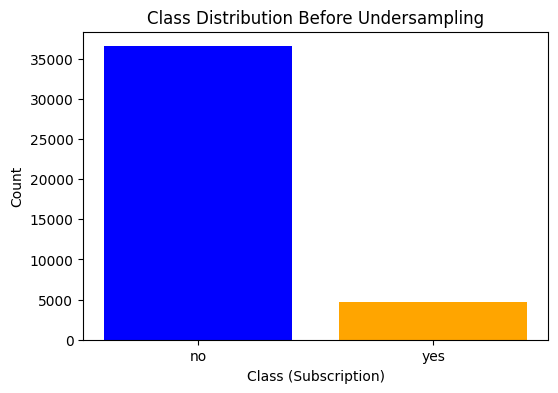

C:\Users\althe\AppData\Local\Temp\ipykernel_8832\3733821387.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_undersampled = df_combined.groupby(y.name, group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42))


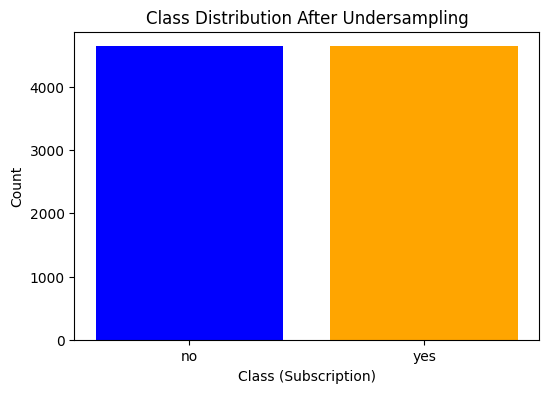

In [18]:
file_path = "bank-additional-full.csv"
df = pd.read_csv(file_path, delimiter=';')
class_counts = df['y'].value_counts()

# Plot the original class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel("Class (Subscription)")
plt.ylabel("Count")
plt.title("Class Distribution Before Undersampling")
plt.show()

# Function for random undersampling
def random_undersample(X, y):
    df_combined = pd.concat([X, y], axis=1)
    min_class_count = y.value_counts().min()

    df_undersampled = df_combined.groupby(y.name, group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42))

    X_resampled = df_undersampled.drop(columns=[y.name])
    y_resampled = df_undersampled[y.name]
    
    return X_resampled, y_resampled

X = df.drop(columns=['y'])
y = df['y']
X_resampled, y_resampled = random_undersample(X, y)

resampled_class_counts = y_resampled.value_counts()

# Plot the new class distribution
plt.figure(figsize=(6, 4))
plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['blue', 'orange'])
plt.xlabel("Class (Subscription)")
plt.ylabel("Count")
plt.title("Class Distribution After Undersampling")
plt.show()

### Question 8

Make a function `random_oversample` that undersamples a classification-type dataset. The algorithm is as follows
- Find the class with the largest number of samples
- For the other classes, randomly replicate data based on the number of data points under the minority class.
- Return the dataset
- Make a simple bar graph showing the balanced distribution.

Use the banking marketing dataset to show the distribution of the dataset before and after undersampling
https://archive.ics.uci.edu/dataset/222/bank+marketing

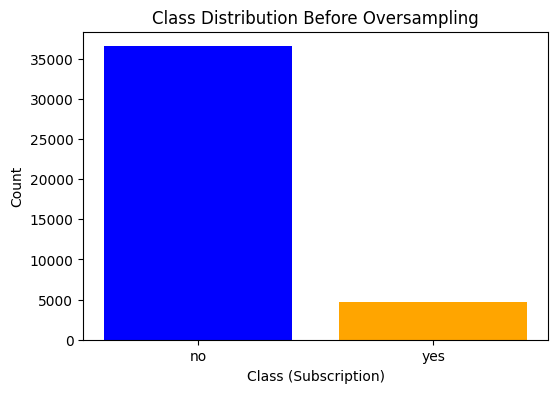

C:\Users\althe\AppData\Local\Temp\ipykernel_8832\1106106221.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_oversampled = df_combined.groupby(y.name, group_keys=False).apply(lambda x: x.sample(max_class_count, replace=True, random_state=42))


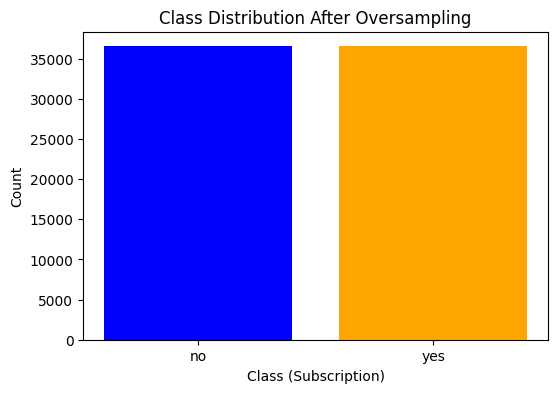

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Function for random oversampling
def random_oversample(X, y):
    # Combine X and y into a single DataFrame
    df_combined = pd.concat([X, y], axis=1)
    
    # Identify the class with the largest number of samples (majority class)
    max_class_count = y.value_counts().max()
    
    # Perform oversampling
    df_oversampled = df_combined.groupby(y.name, group_keys=False).apply(lambda x: x.sample(max_class_count, replace=True, random_state=42))

    # Separate X and y after oversampling
    X_resampled = df_oversampled.drop(columns=[y.name])
    y_resampled = df_oversampled[y.name]
    
    return X_resampled, y_resampled

# Load the dataset
file_path = "bank-additional-full.csv"  # Update path if necessary
df = pd.read_csv(file_path, delimiter=';')  # Using ';' as delimiter since the dataset uses it

# Check class distribution before oversampling
class_counts = df['y'].value_counts()

# Plot the original class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel("Class (Subscription)")
plt.ylabel("Count")
plt.title("Class Distribution Before Oversampling")
plt.show()

# Apply random oversampling
X = df.drop(columns=['y'])
y = df['y']
X_resampled, y_resampled = random_oversample(X, y)

# Check class distribution after oversampling
resampled_class_counts = y_resampled.value_counts()

# Plot the new class distribution
plt.figure(figsize=(6, 4))
plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['blue', 'orange'])
plt.xlabel("Class (Subscription)")
plt.ylabel("Count")
plt.title("Class Distribution After Oversampling")
plt.show()

### Question 9 and 10.

Given the figures generate from the code, please make some insights in terms of
- Underfitting vs. Overfitting at varying degrees
- MSE at varying degrees
- Other observations

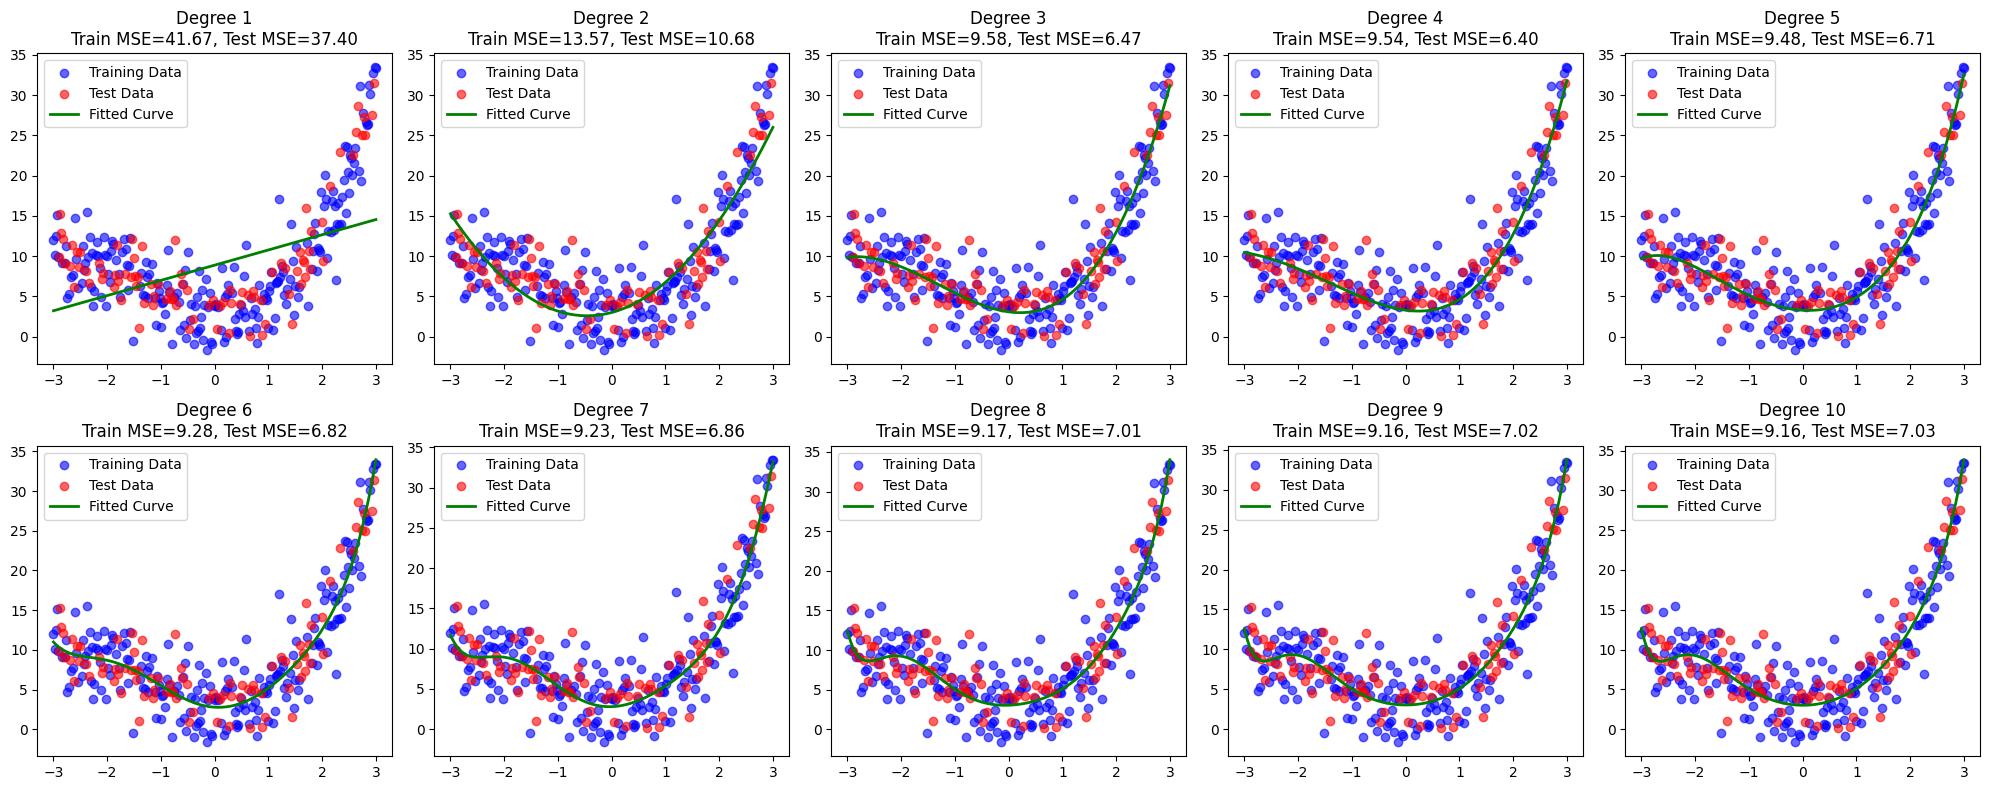

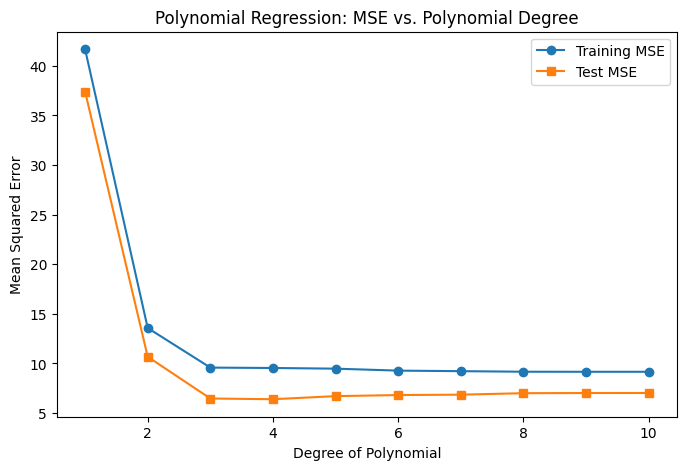

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic dataset
np.random.seed(42)
n_samples = 300
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
# True function: y = 0.5x^3 + 2x^2 - x + 3 + noise
y = 0.5 * X**3 + 2 * X**2 - X + 3 + np.random.normal(0, 3, size=(n_samples,1))
y = y.ravel()  # Flatten to 1D

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Prepare lists to store training and testing MSE for each degree
training_mse = []
testing_mse = []

# We also create a "dense" range for plotting smooth polynomial curves
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

# 3. Fit polynomial regression models of degrees 1 through 10
max_degree = 10

# Create subplots: 2 rows x 5 columns for the 10 degrees
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()  # Flatten to easily iterate

for i, degree in enumerate(range(1, max_degree + 1)):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)
    
    # Fit linear regression on the transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # 4. Record the training and test MSE
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test, y_test_pred)
    
    training_mse.append(train_mse)
    testing_mse.append(test_mse)
    
    # For the plot, predict values on X_plot to see the curve
    X_plot_poly = poly.transform(X_plot)
    y_plot_pred = model.predict(X_plot_poly)
    
    # Subplot: plot the original training data + polynomial fit
    ax = axes[i]
    ax.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')
    ax.scatter(X_test, y_test, color='red', alpha=0.6, label='Test Data')
    ax.plot(X_plot, y_plot_pred, color='green', linewidth=2, label='Fitted Curve')
    
    ax.set_title(f"Degree {degree}\nTrain MSE={train_mse:.2f}, Test MSE={test_mse:.2f}")
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Plot MSE vs Degree separately for clarity
degrees = np.arange(1, max_degree + 1)
plt.figure(figsize=(8, 5))
plt.plot(degrees, training_mse, marker='o', label='Training MSE')
plt.plot(degrees, testing_mse, marker='s', label='Test MSE')
plt.title("Polynomial Regression: MSE vs. Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


The curves generated fitting equations performed variously across different degrees. We can divide them according to levels and how they fit. First is the underfitting degrees; these would be for degrees 1 and 2. They display a fit that is too simple, especially the first degree, which is a straight line. In these cases, they fail to capture the complexity of the data set; this is further supported by their MSE values being too high, telling us that the model cannot generalize with the data set well, thus allowing it to be prone to bias-dominated errors. Next are those with a good fit, the models in degrees 3 to 5. Here, the function begins to approximate the actual shape of the data set. The MSE values also decrease by that point, telling us that the model captures the pattern well. The formed line curves smoothly without erratic changes, typically representing an optimal complexity, allowing for a balance in bias and variance. Lastly are the overfitted models, degrees 6 to 10. They are the models that are too flexible, fitting even the noise created by the dataset. As can be seen, many oscillating curves are in the line instead of keeping a smooth function. Their corresponding MSEs also indicate this as the training MSE is low. At the same time, the test MSE increased, thus indicating that the model merely memorized the dataset but did not generalize well, making it prone to variance-dominated errors.

Following the earlier stated categories of the models, the MSE values change as the degrees of the models change. Generally, as the degree increases, the training MSE decreases. The test MSE, however, would decrease as you move the degrees but would start to grow again after a certain point. This pattern would align with a concept known as the U-shape bias-variance tradeoff. Those in the underfitting models would have high bias but low variance. Those that fit well would have a balanced amount of bias and variance. The high-degree models would have low bias but high variance.

Thus, based on the dataset, the best models are those within the degrees 3 to 5; they minimize the test MSE while avoiding excessive complexity. Degree 1 is insufficient, as it does not capture the curvature of the data at all. Degree 10 is too complex, leading to a higher test MSE than intermediate degrees. A good model would minimize the training MSE and the test MSE. There must be caution when adjusting or finding the right degree, as it could lead to overfitting. So, looking for a more optimal degree where the model balances complexity and generalizability is better.